In [14]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.linalg import pinv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import timeit

Analyzing welding data by welding types

In [15]:
df2 = pd.read_csv('welding_data_by_welding_types.csv')
df2 = pd.get_dummies(df2).drop('welding_type_GMAW', axis=1)
df2 = df2[['current', 'voltage', 'welding_speed', 'plate_thickness',	'welding_type_SAW',	'welding_type_SMAW',	              'welding_type_GTAW', 'heat_input', 'flexural_strength', 'hardness_value', 'residual_stress',
           'tensile_strength']]
df2.head()

,current,voltage,welding_speed,plate_thickness,welding_type_SAW,welding_type_SMAW,welding_type_GTAW,heat_input,flexural_strength,hardness_value,residual_stress,tensile_strength
0,160,32,120,6,0,0,1,1536,236.2,102.5,152.0,432.6
1,130,32,90,8,0,1,0,2218,270.2,96.4,270.2,332.8
2,100,28,120,8,0,0,1,840,360.8,86.4,90.5,382.4
3,160,28,90,10,0,0,1,1792,230.0,105.0,165.4,422.8
4,100,28,120,8,1,0,0,1400,276.5,128.4,186.6,385.5


Exploratory data analysis

In [16]:
# pos = 1
# for i in range(4):
#   print(f'\t{df2.columns[i].capitalize()} vs Response values')
#   plt.figure()
#   for j in range(8, 11):
#     plt.subplot(1, 3, pos)
#     plt.scatter(df2.iloc[:, i], df2.iloc[:, j])
#     plt.ylabel(df2.columns[j])
#     plt.xlabel(df2.columns[i])
#     pos += 1
#   plt.tight_layout()
#   plt.show()
#   print('\n')
#   pos = 1

Generate the necessary variables for modeling

In [17]:
X1 = df2.iloc[:, :7]
X = X1.to_numpy()
y1 = df2.iloc[:, -5:]
y = y1.to_numpy()

In [18]:
def relu(x):
   return np.maximum(x, 0, x)

In [19]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [20]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [21]:
def MAD(y, y_pred):
    '''Calculates the Mean Absolute Deviation of two arrays of numbers
    Input: y(array), y_pred(array)
    Output: float
    '''
    import numpy as np

    return np.average(np.abs(y - y_pred))

In [22]:
def MAPE(y, y_pred):
    '''
    Calculates the relationship between the average prediction error
    and the average expected target error for several consecutive periods.

    Input: y(array), y_pred(array)
    Output: float
    '''
    import numpy as np

    # Calculate prediction error
    error = y - y_pred

    return np.average((np.abs(error)/y) * 100)

In [23]:
def TS(y, y_pred):
    '''
    This index is used to track the accuracy of the model

    Input: y(array), y_pred(array)
    Output: float
    '''
    import numpy as np

    def MAD(y, y_pred):
        '''Calculates the Mean Absolute Deviation of two arrays of numbers
        Input: y(array), y_pred(array)
        Output: float
        '''
        return np.average(np.abs(y - y_pred))

    return np.sum(y - y_pred) / MAD(y, y_pred)

In [24]:
def split_name(name, char='_'):
    index = name.find(char)
    return name[:index].capitalize() + ' ' + name[index+1:].capitalize()


In [25]:
# Split data in readiness for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Convert test data to dataframe and print it.
y_test_df = pd.DataFrame(y_test, columns=['heat_input', 'flexural_strength',	'hardness_value',	'residual_stress',	'tensile_strength'])

Predicting individual response separately to optimize prediction


heat_input: 5 Nodes


,Expected,Predicted
0,1120.0,1116.539543
1,1280.0,1250.437571
2,960.0,924.039383
3,1792.0,1874.312295
4,1024.0,1027.200693
5,2048.0,2015.609019
6,936.0,927.121420
7,768.0,767.783373


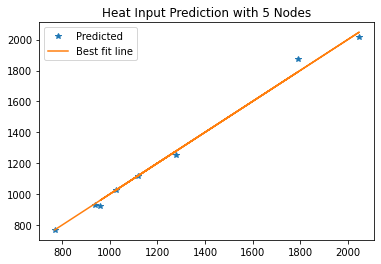


flexural_strength: 5 Nodes


,Expected,Predicted
0,218.4,215.197548
1,238.4,270.702612
2,336.8,312.645386
3,230.0,288.186123
4,196.0,193.461848
5,260.0,278.138076
6,345.0,270.852258
7,394.4,354.197241


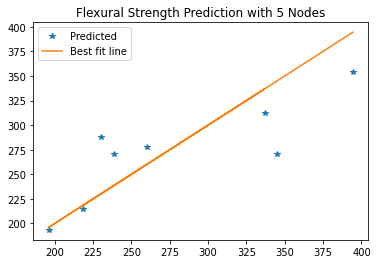


hardness_value: 5 Nodes


,Expected,Predicted
0,132.5,128.414681
1,116.2,119.586089
2,90.6,103.436556
3,105.0,94.948146
4,142.2,146.903150
5,110.0,113.264215
6,80.5,97.382162
7,65.0,91.378882


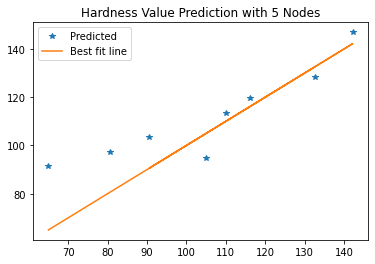


residual_stress: 5 Nodes


,Expected,Predicted
0,188.6,176.680669
1,216.8,221.297712
2,125.8,118.347978
3,165.4,186.052792
4,164.0,179.422884
5,264.6,265.448685
6,108.6,105.930615
7,82.0,98.394665


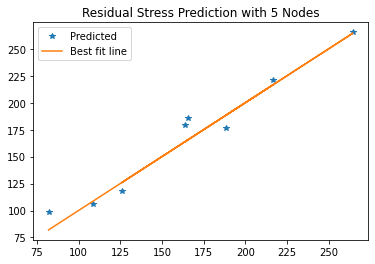


tensile_strength: 5 Nodes


,Expected,Predicted
0,312.8,324.554436
1,442.6,432.212474
2,396.5,461.921031
3,422.8,377.278018
4,280.2,267.246399
5,304.2,333.463923
6,394.6,432.428893
7,378.5,352.538576


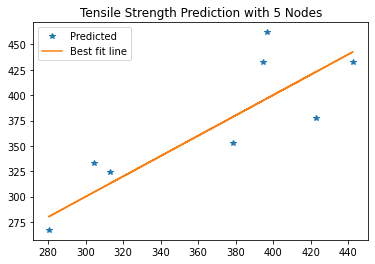


heat_input: 10 Nodes


,Expected,Predicted
0,1120.0,1124.220666
1,1280.0,1280.153301
2,960.0,902.231861
3,1792.0,1845.789810
4,1024.0,1017.093594
5,2048.0,2042.529751
6,936.0,895.640396
7,768.0,747.074625


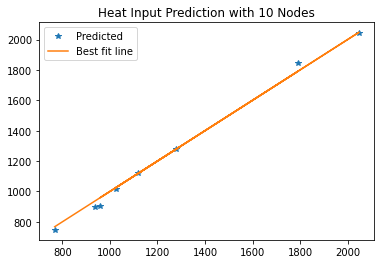


flexural_strength: 10 Nodes


,Expected,Predicted
0,218.4,211.568002
1,238.4,254.289572
2,336.8,285.914398
3,230.0,316.920109
4,196.0,195.168167
5,260.0,267.130636
6,345.0,288.858428
7,394.4,359.594419


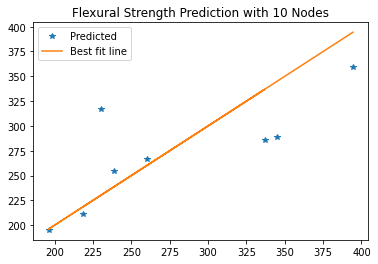


hardness_value: 10 Nodes


,Expected,Predicted
0,132.5,140.801091
1,116.2,117.674958
2,90.6,85.125675
3,105.0,95.840676
4,142.2,135.295278
5,110.0,107.995538
6,80.5,91.183167
7,65.0,77.665935


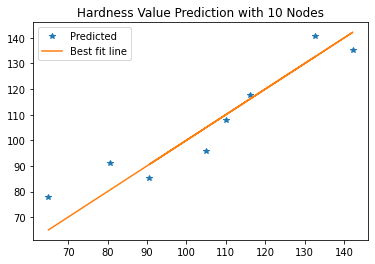


residual_stress: 10 Nodes


,Expected,Predicted
0,188.6,180.628069
1,216.8,220.629182
2,125.8,115.106982
3,165.4,190.245614
4,164.0,167.197577
5,264.6,263.507145
6,108.6,110.075598
7,82.0,88.892989


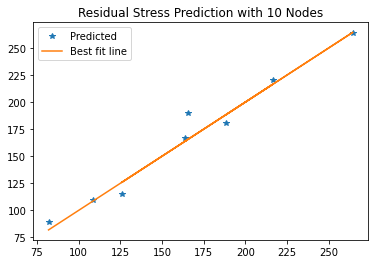


tensile_strength: 10 Nodes


,Expected,Predicted
0,312.8,318.702656
1,442.6,433.890024
2,396.5,465.023463
3,422.8,389.216950
4,280.2,274.525703
5,304.2,337.459542
6,394.6,405.441744
7,378.5,359.782869


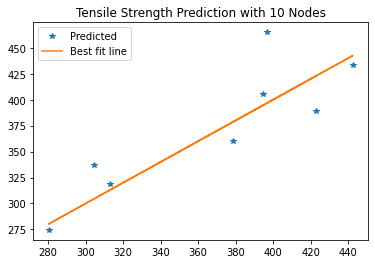


heat_input: 15 Nodes


,Expected,Predicted
0,1120.0,1122.979153
1,1280.0,1260.455496
2,960.0,896.417654
3,1792.0,1851.600504
4,1024.0,1023.627764
5,2048.0,2057.489002
6,936.0,907.120892
7,768.0,759.505273


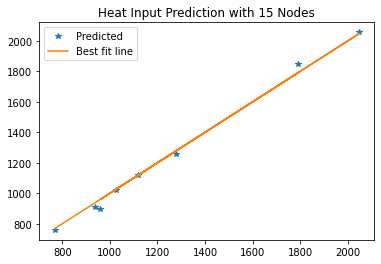


flexural_strength: 15 Nodes


,Expected,Predicted
0,218.4,216.145276
1,238.4,239.068229
2,336.8,314.528556
3,230.0,301.055527
4,196.0,201.183830
5,260.0,256.271834
6,345.0,296.286697
7,394.4,352.473128


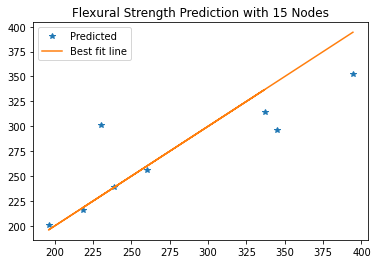


hardness_value: 15 Nodes


,Expected,Predicted
0,132.5,132.084012
1,116.2,115.300094
2,90.6,86.896208
3,105.0,98.602472
4,142.2,142.701705
5,110.0,109.887859
6,80.5,91.387545
7,65.0,84.013352


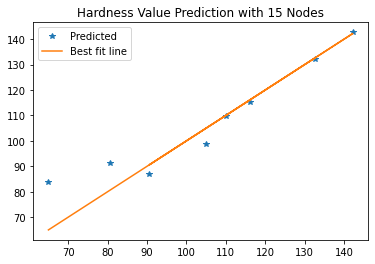


residual_stress: 15 Nodes


,Expected,Predicted
0,188.6,183.521007
1,216.8,224.739346
2,125.8,117.705627
3,165.4,191.748217
4,164.0,159.750030
5,264.6,264.388581
6,108.6,106.074718
7,82.0,89.733675


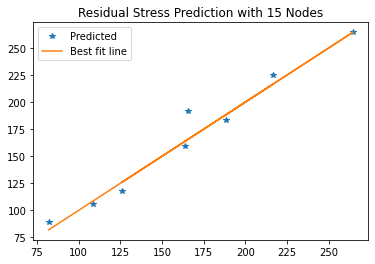


tensile_strength: 15 Nodes


,Expected,Predicted
0,312.8,319.359466
1,442.6,441.117534
2,396.5,461.043913
3,422.8,379.074952
4,280.2,275.981473
5,304.2,339.764076
6,394.6,415.448553
7,378.5,358.726966


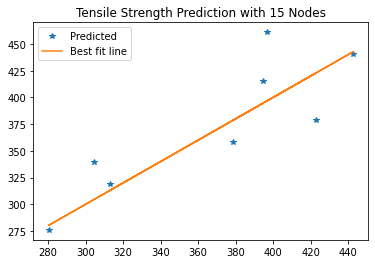


heat_input: 20 Nodes


,Expected,Predicted
0,1120.0,1129.130108
1,1280.0,1287.922096
2,960.0,864.951926
3,1792.0,1856.138970
4,1024.0,1020.249037
5,2048.0,2053.681636
6,936.0,876.460343
7,768.0,754.064145


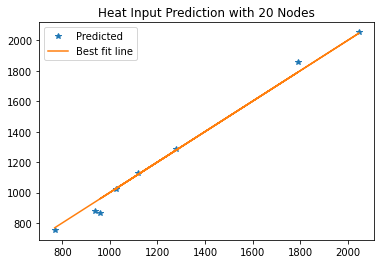


flexural_strength: 20 Nodes


,Expected,Predicted
0,218.4,213.207259
1,238.4,234.312229
2,336.8,291.561157
3,230.0,306.303527
4,196.0,208.313255
5,260.0,262.452269
6,345.0,296.865858
7,394.4,357.296833


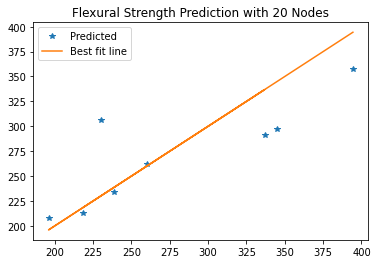


hardness_value: 20 Nodes


,Expected,Predicted
0,132.5,135.057558
1,116.2,118.508237
2,90.6,89.348492
3,105.0,100.063678
4,142.2,136.594918
5,110.0,109.850795
6,80.5,91.645637
7,65.0,80.790256


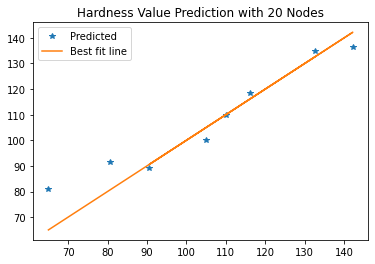


residual_stress: 20 Nodes


,Expected,Predicted
0,188.6,178.471227
1,216.8,220.269336
2,125.8,115.973628
3,165.4,191.847185
4,164.0,178.605114
5,264.6,270.185507
6,108.6,105.343259
7,82.0,88.109323


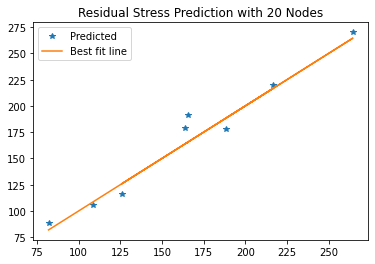


tensile_strength: 20 Nodes


,Expected,Predicted
0,312.8,319.906989
1,442.6,440.148336
2,396.5,470.394479
3,422.8,382.263746
4,280.2,271.908882
5,304.2,326.403142
6,394.6,428.609956
7,378.5,360.623610


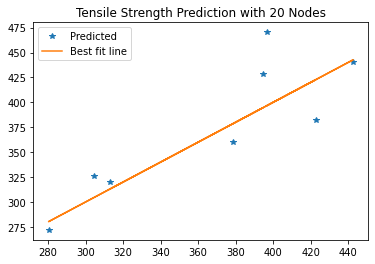


heat_input: 25 Nodes


,Expected,Predicted
0,1120.0,1129.158596
1,1280.0,1290.901355
2,960.0,890.180322
3,1792.0,1860.155424
4,1024.0,1017.256232
5,2048.0,2038.857095
6,936.0,913.023706
7,768.0,757.988971


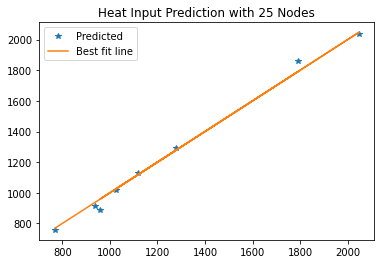


flexural_strength: 25 Nodes


,Expected,Predicted
0,218.4,214.786617
1,238.4,235.805006
2,336.8,284.667262
3,230.0,295.383041
4,196.0,200.370004
5,260.0,264.138752
6,345.0,285.241127
7,394.4,354.975697


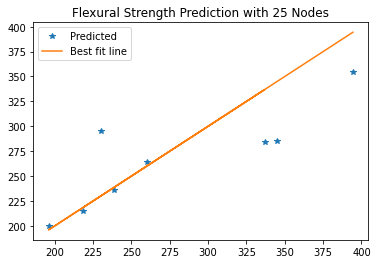


hardness_value: 25 Nodes


,Expected,Predicted
0,132.5,132.494617
1,116.2,115.847444
2,90.6,86.200924
3,105.0,99.518890
4,142.2,140.360018
5,110.0,109.548166
6,80.5,89.141363
7,65.0,92.635724


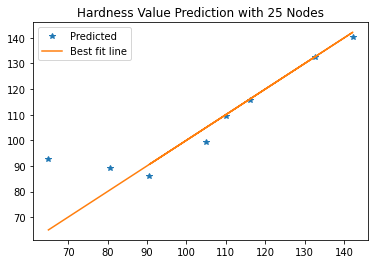


residual_stress: 25 Nodes


,Expected,Predicted
0,188.6,181.246926
1,216.8,220.989132
2,125.8,113.999191
3,165.4,191.151849
4,164.0,170.828658
5,264.6,267.803901
6,108.6,105.575874
7,82.0,87.338721


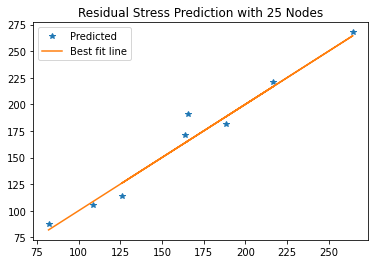


tensile_strength: 25 Nodes


,Expected,Predicted
0,312.8,319.796493
1,442.6,431.814051
2,396.5,490.573309
3,422.8,378.822308
4,280.2,277.940142
5,304.2,325.632334
6,394.6,432.096335
7,378.5,355.226682


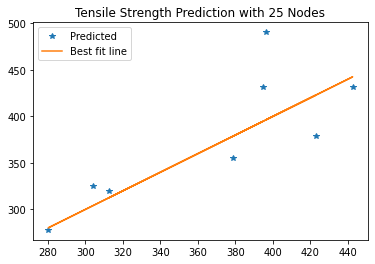


heat_input: 30 Nodes


,Expected,Predicted
0,1120.0,1125.402504
1,1280.0,1279.538426
2,960.0,870.644797
3,1792.0,1857.657982
4,1024.0,1026.779974
5,2048.0,2053.130033
6,936.0,916.674302
7,768.0,759.977510


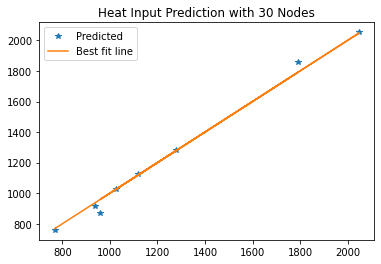


flexural_strength: 30 Nodes


,Expected,Predicted
0,218.4,212.906759
1,238.4,240.794507
2,336.8,298.110999
3,230.0,307.995921
4,196.0,202.394224
5,260.0,263.729292
6,345.0,292.647837
7,394.4,359.488700


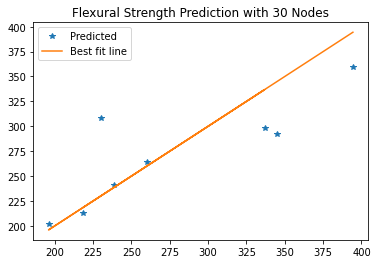


hardness_value: 30 Nodes


,Expected,Predicted
0,132.5,139.872055
1,116.2,110.855515
2,90.6,86.517893
3,105.0,102.138841
4,142.2,136.206879
5,110.0,108.295686
6,80.5,90.060255
7,65.0,85.111643


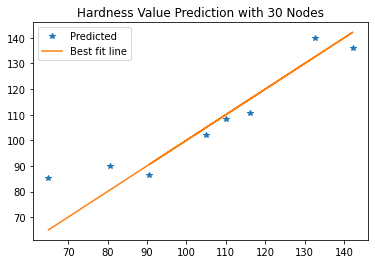


residual_stress: 30 Nodes


,Expected,Predicted
0,188.6,182.187211
1,216.8,221.070873
2,125.8,116.751751
3,165.4,188.847069
4,164.0,174.152344
5,264.6,267.617043
6,108.6,107.111284
7,82.0,95.427995


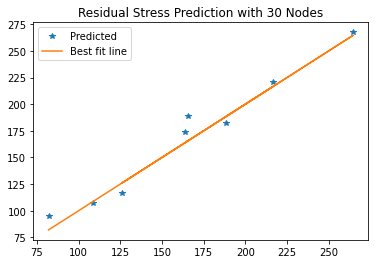


tensile_strength: 30 Nodes


,Expected,Predicted
0,312.8,317.493351
1,442.6,443.993068
2,396.5,477.767536
3,422.8,375.237551
4,280.2,279.195340
5,304.2,334.198815
6,394.6,426.460500
7,378.5,355.485667


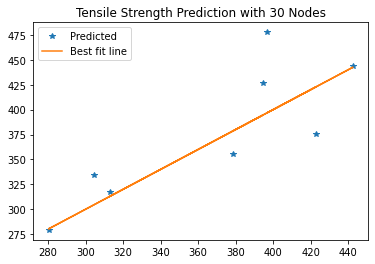

,Variable,Nodes,R2,MSE,RMSE,MAD,MAPE,TS,Time
0,heat_input,5,0.993205,1261.586011,35.518812,24.497835,1.728585,1.018731,0.026863
1,flexural_strength,5,0.310883,1559.045772,39.484754,31.609066,10.930356,1.126857,0.003066
2,hardness_value,5,0.487169,163.449989,12.784756,10.198528,12.196034,-5.227605,0.000341
3,residual_stress,5,0.951763,144.858325,12.035710,9.982185,7.372650,-3.583985,0.000248
4,tensile_strength,5,0.680807,1215.927902,34.870158,29.886602,8.007473,-1.654378,0.000025
5,heat_input,10,0.994588,1049.091269,32.389678,23.699194,2.173267,3.091497,0.000366
6,flexural_strength,10,0.259280,1857.305889,43.096472,32.429613,11.369752,1.219758,0.000456
7,hardness_value,10,0.864380,63.899260,7.993701,7.083498,7.716840,-1.352766,0.002205
8,residual_stress,10,0.965091,108.871125,10.434133,7.499845,5.205283,-2.731144,0.002957
9,tensile_strength,10,0.726550,942.532557,30.700693,23.151482,6.216398,-2.239293,0.002410


In [26]:
metrics = []
for hidden_size in range(1000, 6500, 1000):
    # print(f'\nELM Analysis for {hidden_size} Node(s)')
    for i in range(y.shape[1]):
        metric = [y1.columns[i], int(hidden_size/200)]
        cols = y[:, i]
        X_train, X_test, y_train, y_test = train_test_split(X, cols,random_state=1, test_size=0.2)

        tic = timeit.timeit() #Start timer
        input_size = X_train.shape[1]
        input_weights = np.random.normal(size=[input_size,hidden_size])
        biases = np.random.normal(size=[hidden_size])
        output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)
        prediction = predict(X_test)
        toc = timeit.timeit() #Stop timer

        # Display data
        print(f'\n{y1.columns[i]}: {int(hidden_size/200)} Nodes')
        a = []
        for j in range(len(y_test)):
            a.append([y_test[j], prediction[j]])

        a_df = pd.DataFrame(a, columns=['Expected', 'Predicted'])

        # Display output
        display(a_df)
        plt.plot(y_test, prediction, '*', label='Predicted')
        plt.plot(y_test, y_test, label='Best fit line')
        plt.title(f'{split_name(y1.columns[i])} Prediction with {int(hidden_size/200)} Nodes')
        plt.legend()
        plt.show()
        
        

        # Calculate the necessary metrics
        r2 = r2_score(prediction, y_test)
        mse = mean_squared_error(y_test, prediction)
        rmse = np.sqrt(mse)
        mad = MAD(y_test, prediction)
        mape = MAPE(y_test, prediction)
        ts = TS(y_test, prediction)
        time = abs(toc - tic)

        metric.extend([r2, mse, rmse, mad, mape, ts, time])   # Update metric
        metrics.append(metric)  # Undate metrics


metrics_df = pd.DataFrame(metrics, columns=['Variable', 'Nodes', 'R2', 'MSE', 'RMSE', 'MAD', 'MAPE', 'TS', 'Time'])

display(metrics_df)